# Apuntes de Mineria de Datos.

### Librerias necesarias

In [2]:
#Impoertar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from collections import Counter
from scipy.stats import skew
from scipy.stats import kurtosis

### Optencion de datos

In [3]:
# cargar un cojunto de datos obteneidos desde un archivo .csv
co2 = pd.read_csv("data_set.csv")

# se necesita una copia de los datos ya que NUNACA SE DEBE TRABAJAR SOBRE LA MISMA MUESTRA ORIGINAL
df = co2.copy()

- manipulacion de datos 

In [4]:
# entendiendo nuestros datos
df.head() # muestra los primeros n filas

df.tail() # muestra lo constrario a head que son los ultimos n datos

df.sample() # es un método de la librería pandas en Python que se utiliza para obtener una muestra aleatoria de filas (o columnas) de un DataFrame

df.info() # nos da el nombre de la variable, el rango, 12 columnas, el numero de columna, nombre de la columna, valores vacios, tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

- revicion de la integridad de los datos

In [5]:
# revisar valores faltantes
missing_count = df.isnull().sum() # suma de los valores faltantes
print(missing_count)

# conteo del numero de valores de la columna
value_count = df.isnull().count() # cuenta los valores de la columna
print(missing_count)

missing_percentaje = round(missing_count/value_count*100, 2) # porcentaje de perdida de datos
missing_df = pd.DataFrame({"Count": missing_count, "Persentaje": missing_percentaje}) # genera un frame/ escrito de la info onbtenida


print(missing_df)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
                                  Count  Persentaje
Make      

In [6]:
#observar los valores unicos
def get_unique_values (df):
  output_data = []
  for col in df.columns:
    # si el numero de valores unicos es menor o igual a 10
    if df.loc[ :, col].nunique() <=10:
      # obtenemos los valores unicos en la columna
      unique_values = df.loc[ :,col].unique()
      # agregamos  el nombre de la columa, el numero de valores
      # unicos y los datos unicos.
      output_data.append([col, df.loc[ :, col].nunique(),
                          unique_values, df.loc[ :, col].dtype])
    else:
        # en cada caso contrario, agrega solamente el nombre de la
        # columna, el numero de valores unicos y el tipo de dato.
        output_data.append([col, df.loc[ :, col].nunique(),
                            "-",df.loc[:, col].dtype])
  output_df = pd.DataFrame(output_data, columns = ["columns name",
                                                    "Number of unique Values", "Unique values",
                                                    "Data type"])
  return output_df


get_unique_values(df)

,columns name,Number of unique Values,Unique values,Data type
0,Make,42,-,object
1,Model,2048,-,object
2,Vehicle Class,16,-,object
3,Engine Size(L),51,-,float64
4,Cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,Transmission,27,-,object
6,Fuel Type,5,"[Z, D, X, E, N]",object
7,Fuel Consumption City (L/100 km),211,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),181,-,float64


In [7]:
#Resumen de estadistica basica para caracteristicas numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
#Resumen de estadistica basica para caractericsticas categoricas
df.describe(include='object').T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2048,F-150 FFV,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [9]:
#renombrar caracteristicas
df.rename(columns = {
    'Make' :'make',
    'Model' : 'model',
    'Vehicle Class' : 'vehicle class',
    'Engine Size(L)' : 'engine_size',
    'Cylinders' : 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type' : 'fuel type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)' : 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)' : 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)' : 'fuel_cons_mpg',
    'CO2 Emissions(g/km)' : 'co2'

}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            7385 non-null   object 
 1   model           7385 non-null   object 
 2   vehicle class   7385 non-null   object 
 3   engine_size     7385 non-null   float64
 4   cylinders       7385 non-null   int64  
 5   transmission    7385 non-null   object 
 6   fuel type       7385 non-null   object 
 7   fuel_cons_city  7385 non-null   float64
 8   fuel_cons_hwy   7385 non-null   float64
 9   fuel_cons_comb  7385 non-null   float64
 10  fuel_cons_mpg   7385 non-null   int64  
 11  co2             7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


## Visualizacion de los Datos

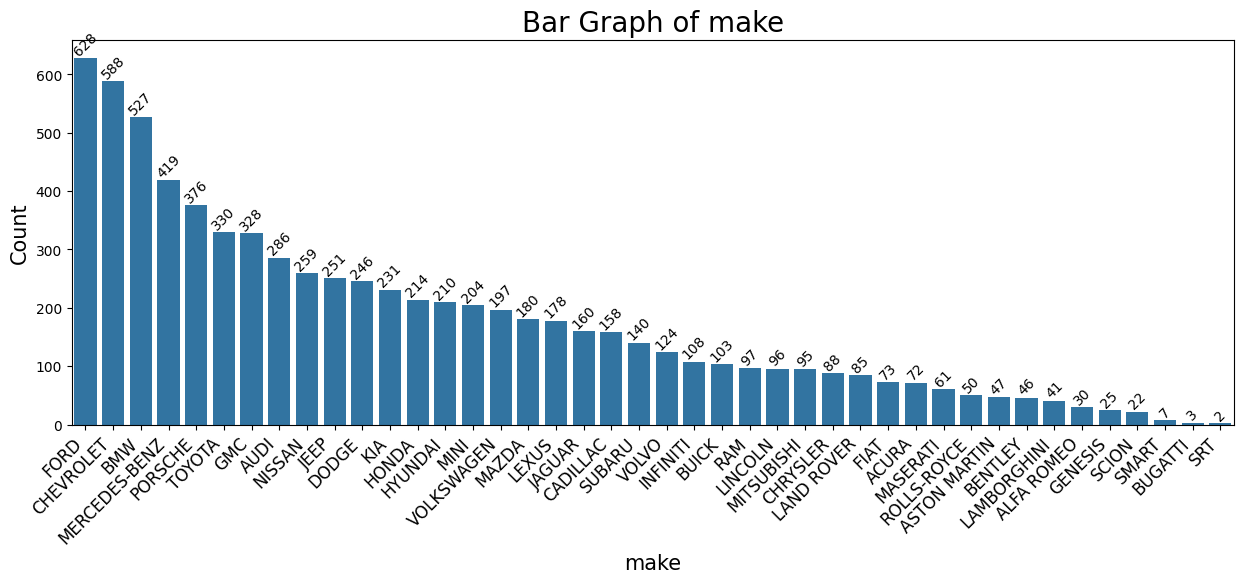

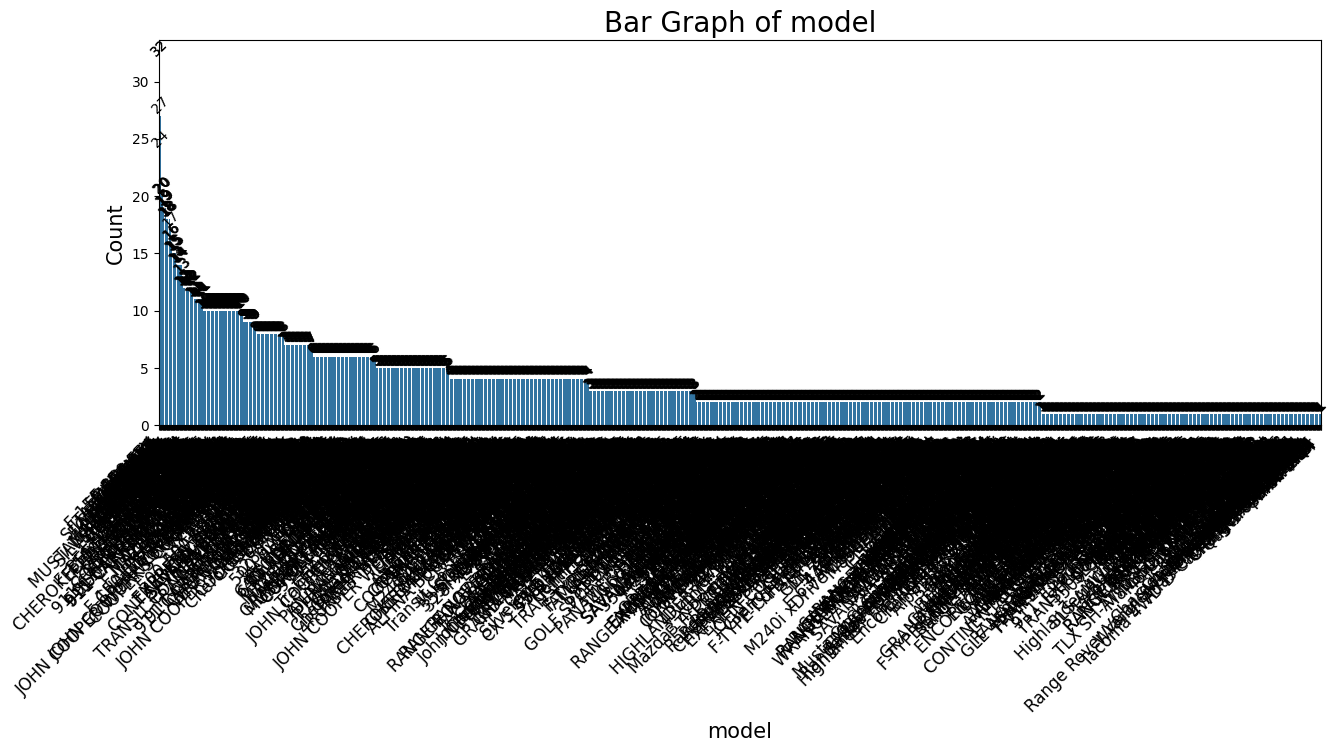

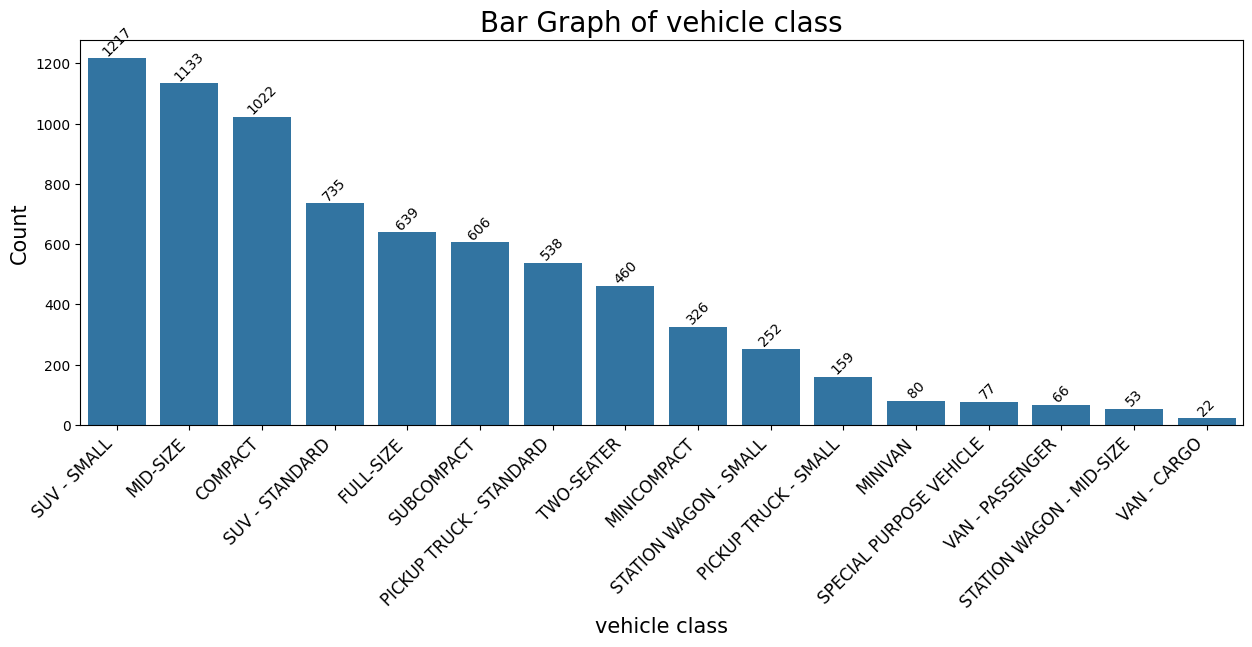

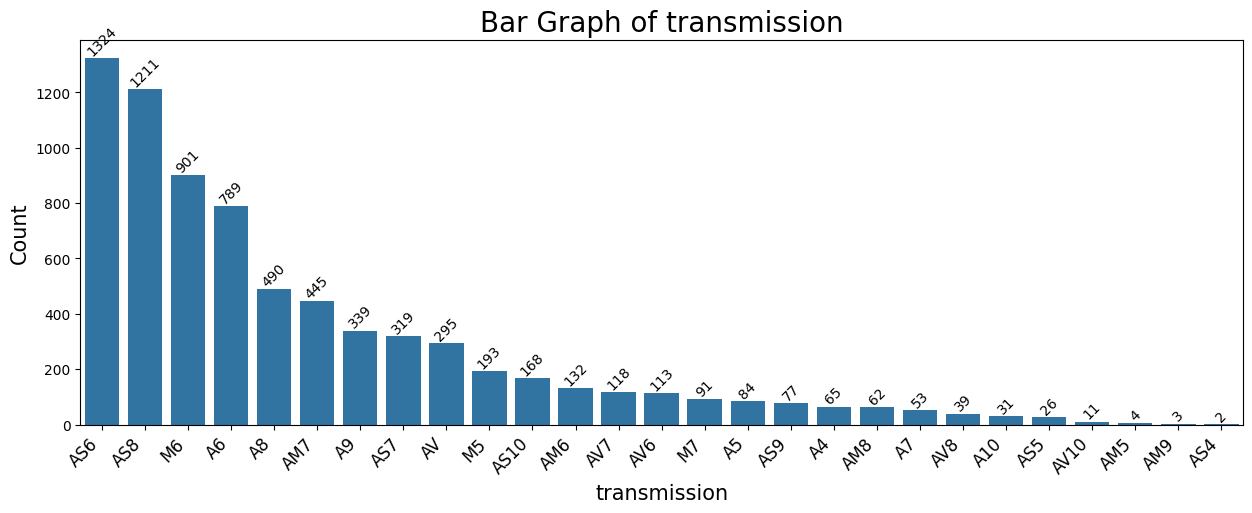

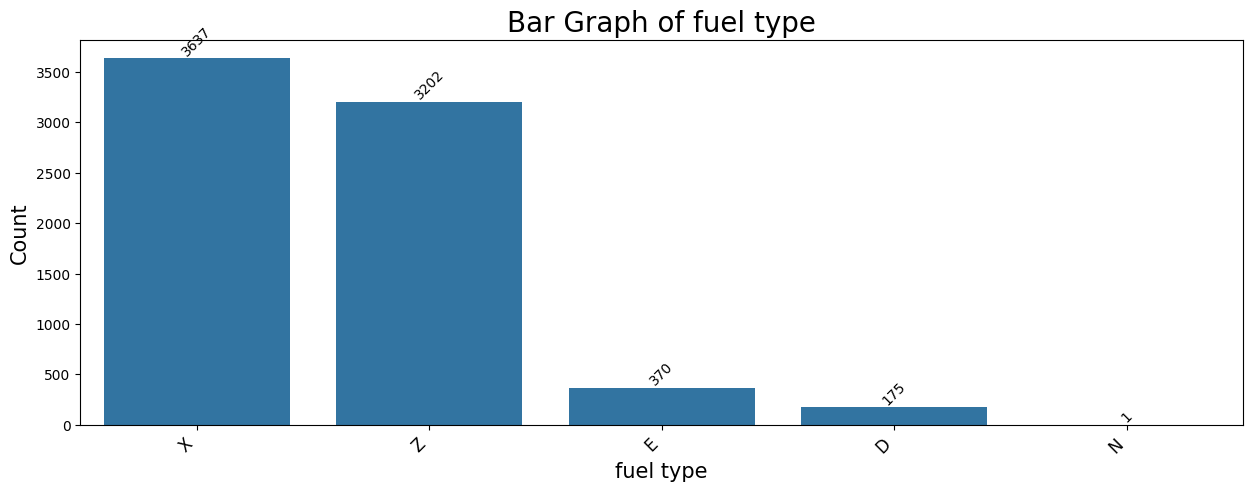

In [11]:
import plotly.graph_objects as go

#obersvar distribucion de las variables categoricas
#con gradfico de barras o histogramas
def plot_bar_graphs(df, columns):
  for column in columns:
    plt.figure(figsize = (15,5))
    ax = sns.countplot(x = column, data = df,
                       order = df[column].value_counts().index)
    ax.bar_label(ax.containers[0], rotation = 45)
    plt.xlabel (column, fontsize=15)
    plt.ylabel('Count', fontsize = 15)
    plt.title(f'Bar Graph of {column}', fontsize = 20) #Formatear columnna
    plt.xticks(rotation = 45, ha = 'right', fontsize = 12)   
    plt.show()

cat_features = ['make', 'model', 'vehicle class', 'transmission', 'fuel type']
plot_bar_graphs(df, cat_features)

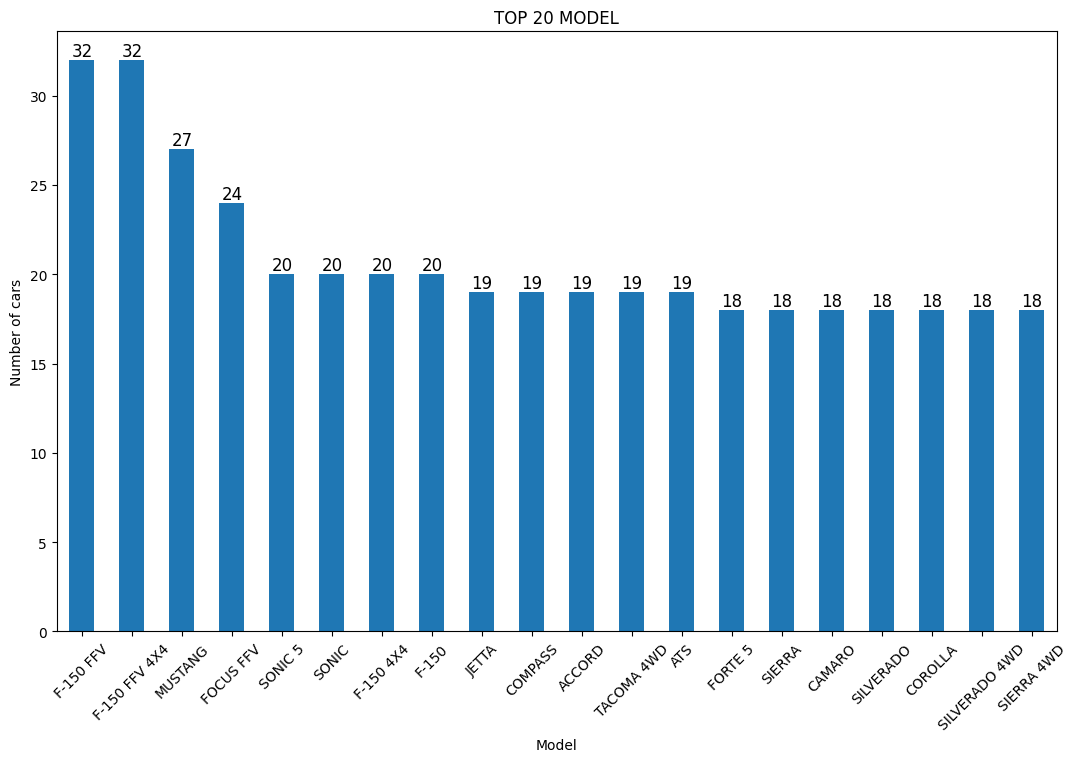

In [12]:
#generar plot con los primeros 20 modelos del conjunyo de datos
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind= 'bar')
plt.title('TOP 20 MODEL')
plt.xlabel('Model')
plt.ylabel('Number of cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels = counts.values, fontsize=12)
plt.show()

In [13]:
#Mostrar la relacion entre nuestros atributos categoricos
# y nuestra variable dependiente
def plot_bar_with_co2(df, columns):
  for column in columns:
    plt.figure(figsize = (15,5))
    grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
    grouped_data_sorted = grouped_data.sort_values(by = 'co2', ascending = False) # Define grouped_data_sorted before using it
    ax = sns.barplot(x = column, y = 'co2', data = grouped_data_sorted,
                     order = grouped_data_sorted[column]) # Correctly specify the order

    ax.bar_label(ax.containers[0], rotation = 90)
    plt.xlabel(column, fontsize = 18)
    plt.ylabel('Mean Co2 Emission)', fontsize = 15)
    plt.title(f'Mean Co2 Emission by {column}', fontsize = 20)
    plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
    plt.show()
    # Remove redundant lines
    # plt.xticks(rotation = 45, ha='right', fontsize = 12)
    # plt.title(f"Relacion de {column} vs co2 emission")
    # plt.show()

   make  model  vehicle class  engine_size  cylinders  transmission  \
0     0   1056              0          2.0          4            14   
1     0   1056              0          2.4          4            25   
2     0   1057              0          1.5          4            22   
3     0   1232             11          3.5          6            15   
4     0   1498             11          3.5          6            15   

   fuel type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  fuel_cons_mpg  \
0          4             9.9            6.7             8.5             33   
1          4            11.2            7.7             9.6             29   
2          4             6.0            5.8             5.9             48   
3          4            12.7            9.1            11.1             25   
4          4            12.1            8.7            10.6             27   

   co2  
0  196  
1  221  
2  136  
3  255  
4  244  


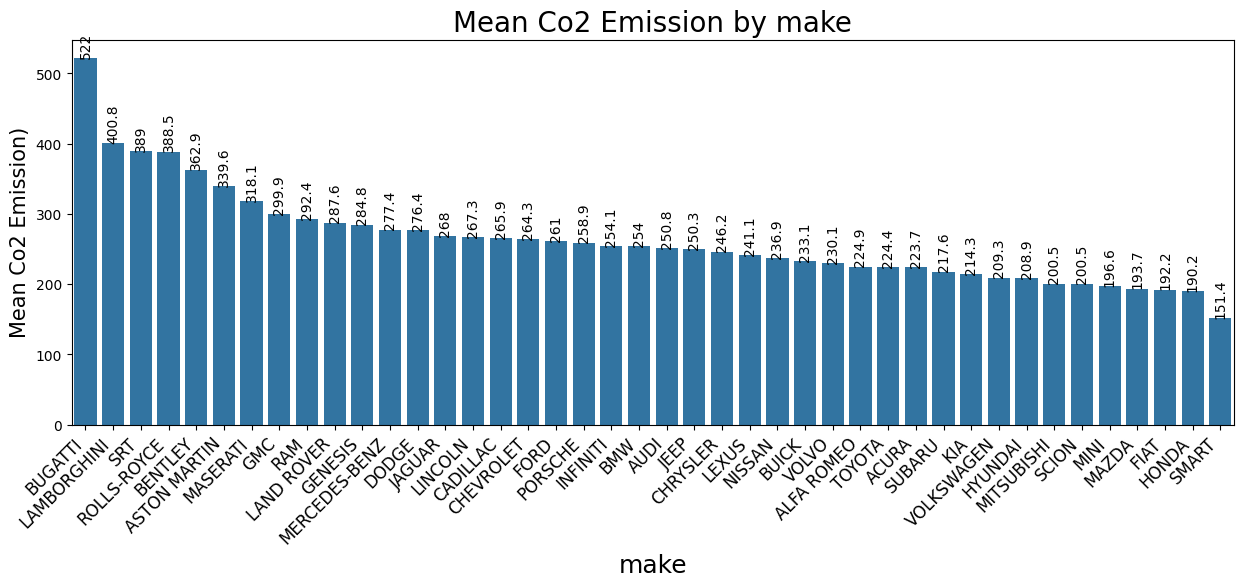

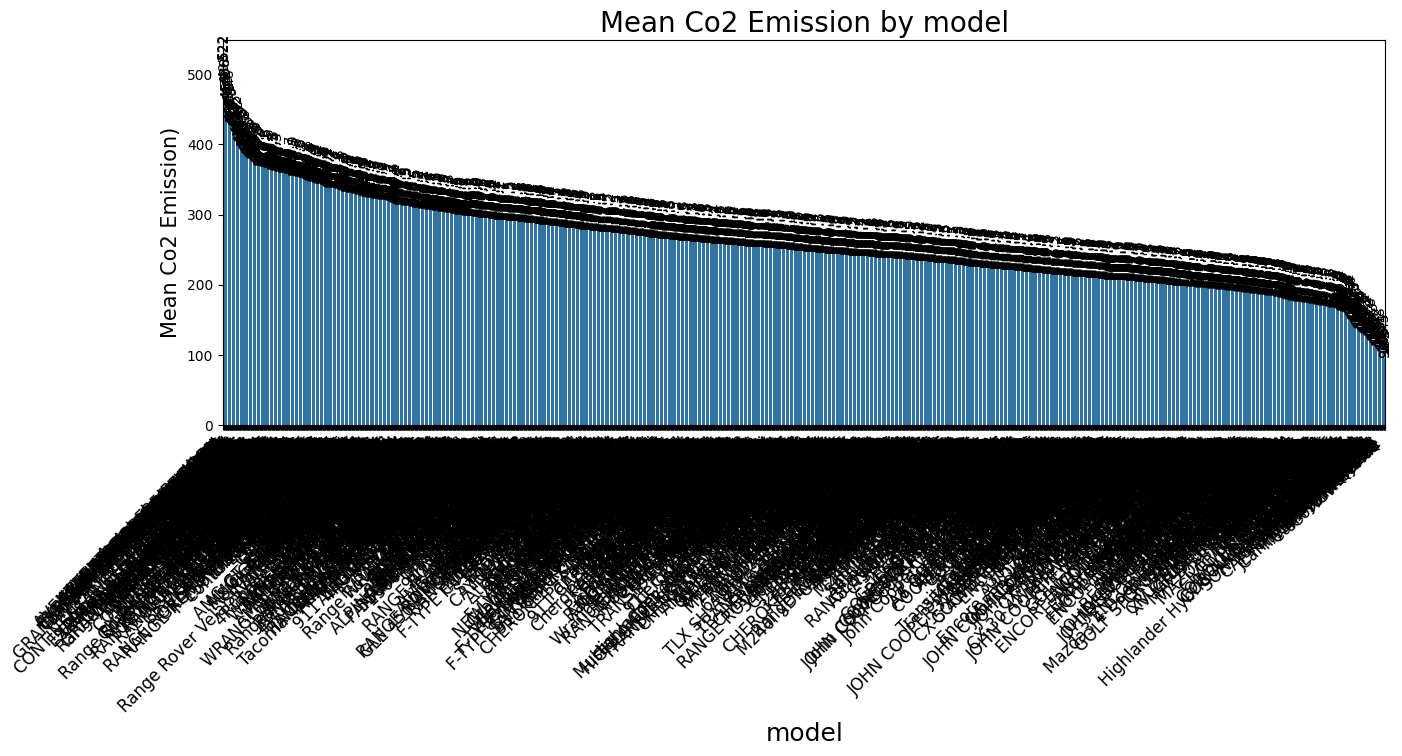

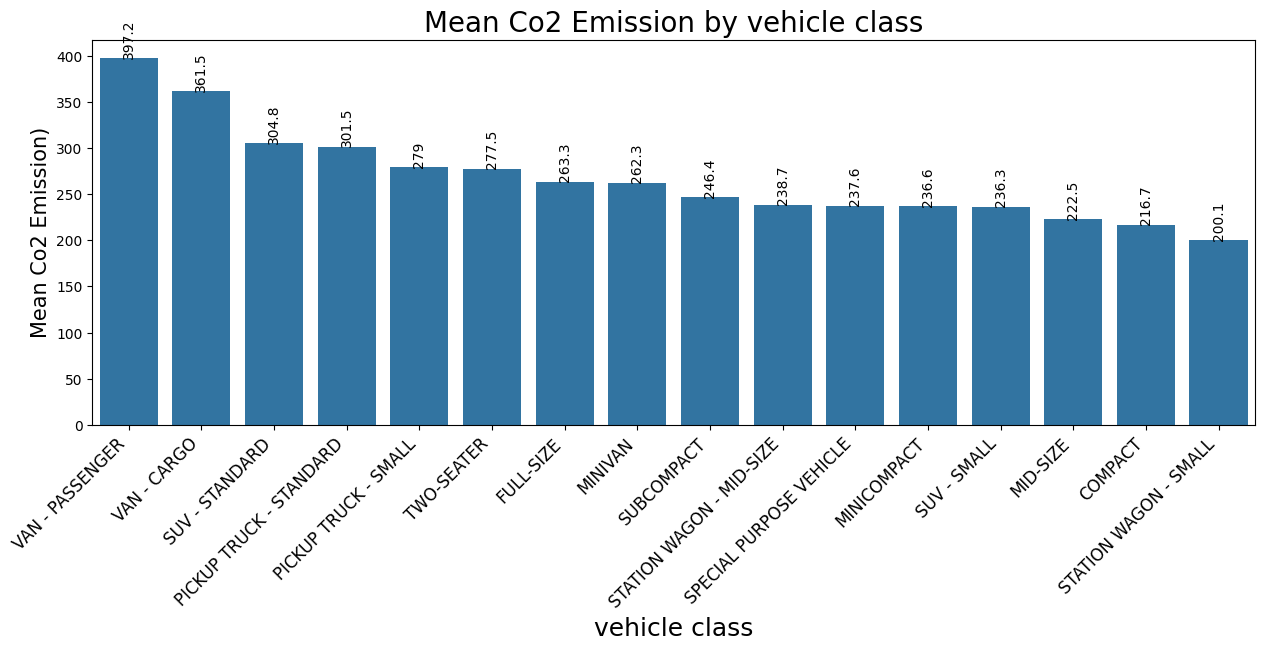

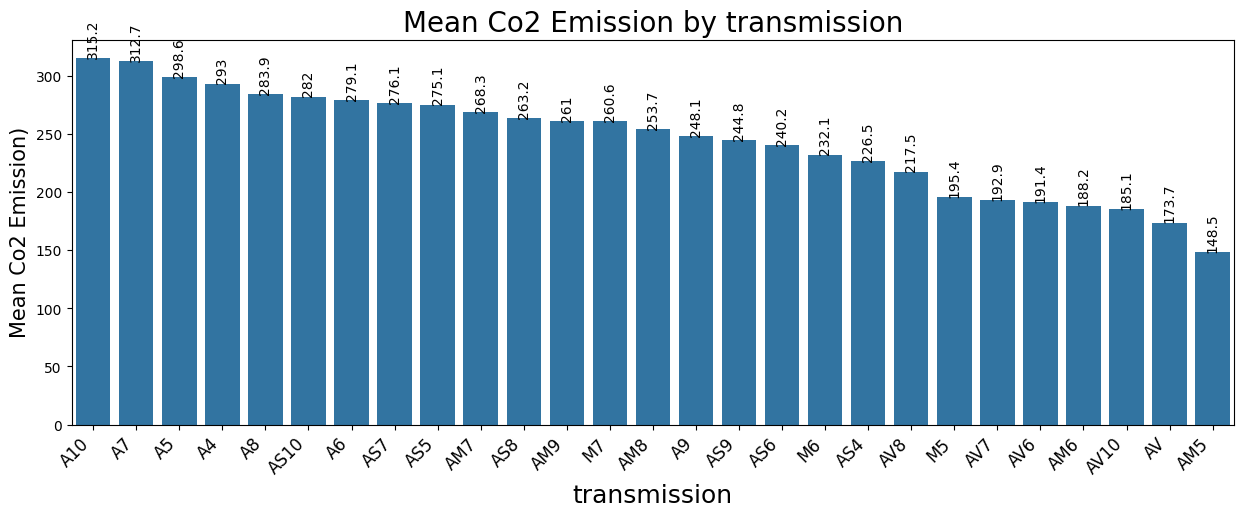

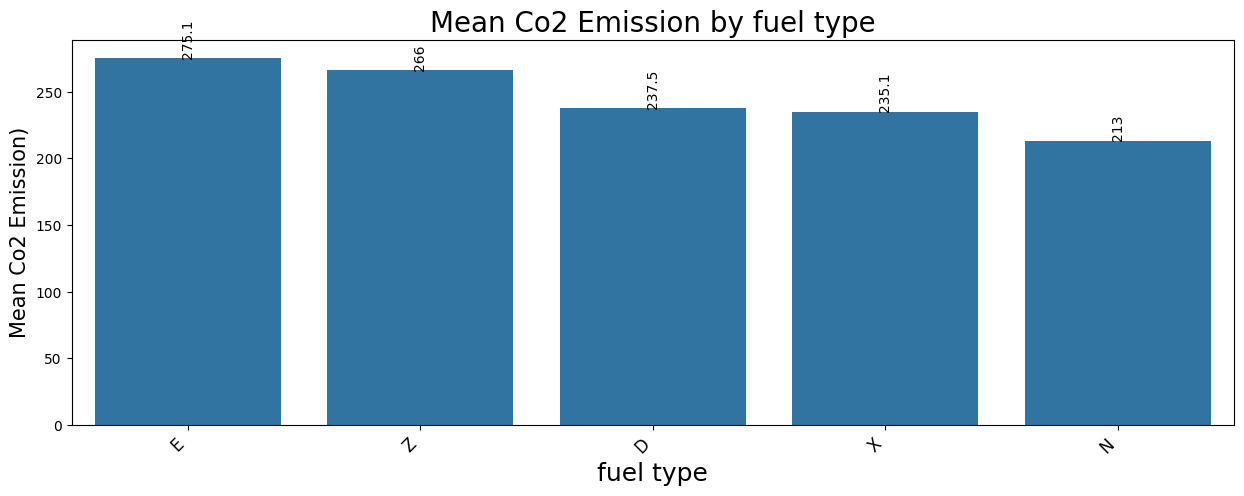

In [14]:
#LABEL ENCODING CATEGORICALN FEATURES
from sklearn.preprocessing import LabelEncoder

#Copiar el dataframe original para evitar copiar
#de forma directa
df_labeled = df.copy()
#Aplicar codificacion de etiquetas para cada columna categorica
label_encoders = {}
for column in cat_features:
  le = LabelEncoder()
  df_labeled[column] = le.fit_transform(df[column])
  label_encoders[column] = le
print(df_labeled.head())

plot_bar_with_co2(df, cat_features)

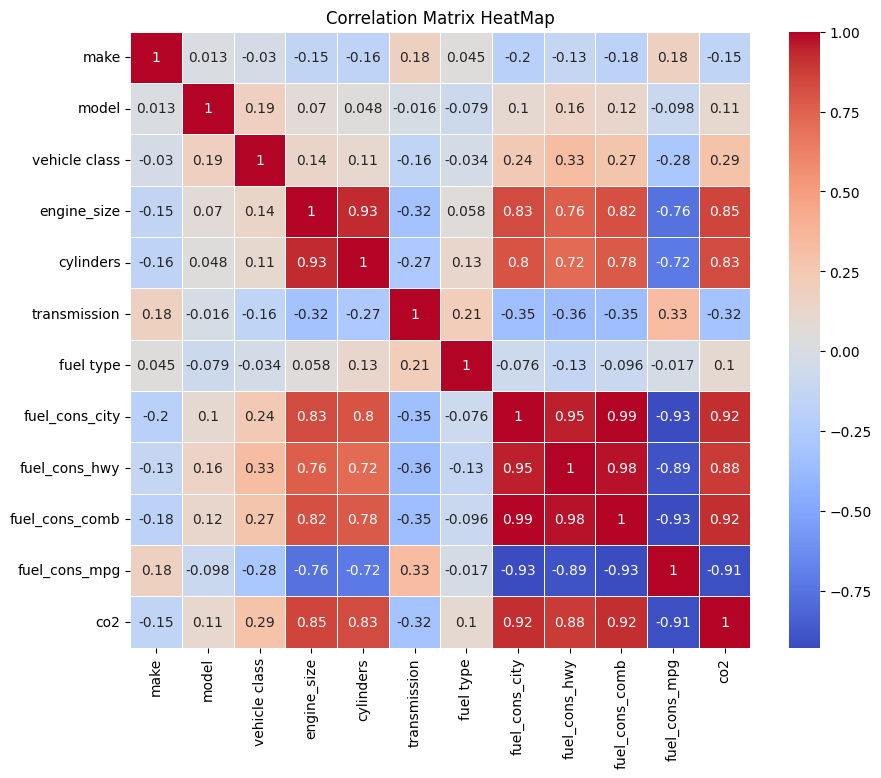

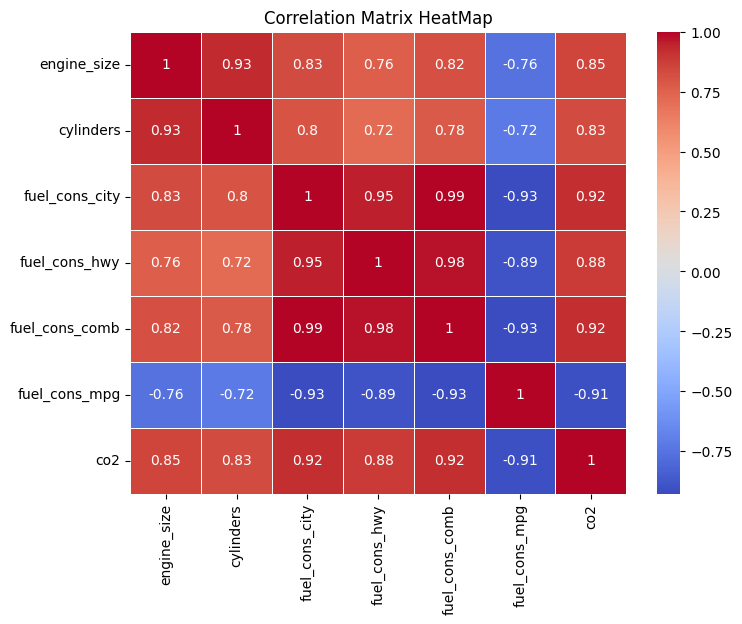

In [15]:
#Generar l amtriz de la correlación

correlation_matrix = df_labeled.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',
            linewidths=0.5)
plt.title('Correlation Matrix HeatMap')
plt.show()


correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',
            linewidths=0.5)
plt.title('Correlation Matrix HeatMap')
plt.show()

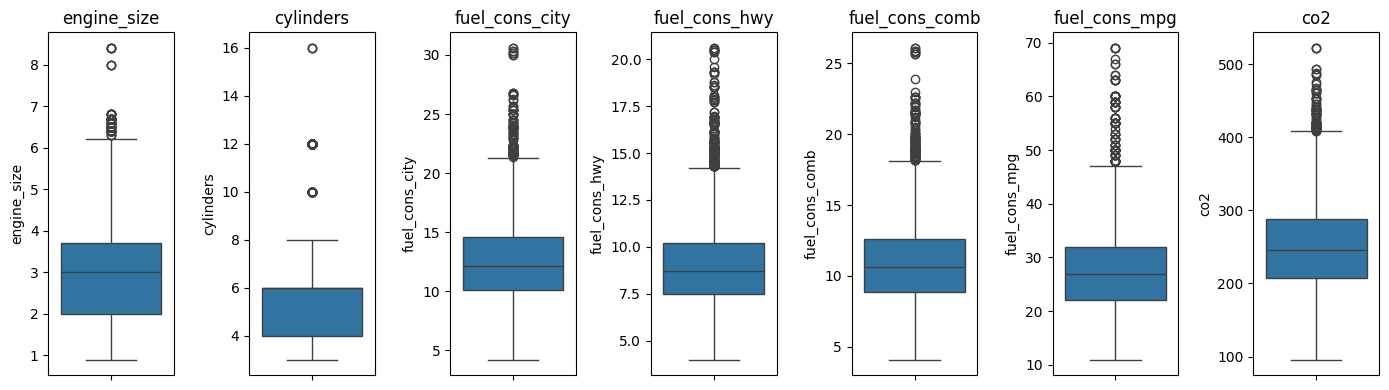

In [16]:
#Analisis de outliers
x=0
plt.figure(figsize=(16,4))
for col in df.select_dtypes(include=['number']).columns:
  x+=1
  plt.subplot(1,8,x)
  sns.boxplot(data=df[col])
  plt.title(col)
  plt.tight_layout()
plt.show()


#grafica de cajas y bigotes boxplot

## Medidas de Tendencia Central

In [17]:
#MEDIA -esto lo hizo dani
def calcular_media(columna):
    """
    Calcula la media aritmética de una columna de datos.

    📊 PARÁMETROS:
    columna: Serie de pandas, array de numpy o lista con los datos

    📊 RETORNA:
    float: Valor de la media aritmética
    """
    # Convertir a numpy array si es una Serie de pandas
    if isinstance(columna, pd.Series):
        datos = columna.values
    else:
        datos = np.array(columna)

    # Filtrar valores no numéricos y NaN
    datos_numericos = datos[np.isfinite(datos)]

    if len(datos_numericos) == 0:
        raise ValueError("La columna no contiene valores numéricos válidos")

    # Calcular la media
    media = np.sum(datos_numericos) / len(datos_numericos)
    return media

# 📊 EXPLICACIÓN: np.isfinite()
# Filtra valores que son números finitos (excluye NaN, infinito, etc.)

#Sacar la media de Engine size (L)
media_engine_size = calcular_media(df['engine_size'])
print(f"La media de Engine size (L) es: {media_engine_size}")

#Sacar la media de cylinders
media_cylinders = calcular_media(df['cylinders'])
print(f"La media de cylinders es: {media_cylinders}")

#Sacar la media de consumption city
media_fuel_cons_city = calcular_media(df['fuel_cons_city'])
print(f"La media de consumption city es: {media_fuel_cons_city}")

#Sacar la media de consumption hwy
media_fuel_cons_hwy = calcular_media(df['fuel_cons_hwy'])
print(f"La media de consumption hwy es: {media_fuel_cons_hwy}")

#Sacar la media de consumption comb
media_fuel_cons_comb = calcular_media(df['fuel_cons_comb'])
print(f"La media de consumption comb es: {media_fuel_cons_comb}")

#Sacar la media de Fuel Consumption Comb (mpg)
media_fuel_cons_mpg = calcular_media(df['fuel_cons_mpg'])
print(f"La media de Fuel Consumption Comb (mpg) es: {media_fuel_cons_mpg}")

#Sacar la media de C02 emissions
media_co2 = calcular_media(df['co2'])
print(f"La media de C02 emissions es: {media_co2}")

#Calcular moda

def calcular_moda_basica(columna):
    """
    Calcula la moda (valor que más se repite) de una columna.

    📊 PARÁMETROS:
    columna: Serie de pandas, array o lista con datos

    📊 RETORNA:
    Valor o lista de valores que más se repiten
    """
    # Limpiar datos: eliminar NaN y valores no finitos
    datos_limpios = columna.dropna()
    datos_limpios = datos_limpios[np.isfinite(datos_limpios)]

    if len(datos_limpios) == 0:
        return None

    # Usar Counter para contar frecuencias
    contador = Counter(datos_limpios)

    # Encontrar el valor máximo de frecuencia
    max_frecuencia = max(contador.values())

    # Encontrar todos los valores con esa frecuencia máxima
    modas = [valor for valor, freq in contador.items() if freq == max_frecuencia]

    # Si hay una sola moda, retornar el valor, sino retornar la lista
    return modas[0] if len(modas) == 1 else modas

# 📊 EXPLICACIÓN: Counter de collections
# Es una clase especializada en contar elementos de colecciones
# Muy eficiente para encontrar frecuencias

#Sacar la moda de Engine size (L)
moda_engine_size = calcular_moda_basica(df['engine_size'])
print(f"La moda de Engine size (L) es: {moda_engine_size}")

#Sacar moda de cylinders
moda_cylinders = calcular_moda_basica(df['cylinders'])
print(f"La moda de cylinders es: {moda_cylinders}")

#Sacar la moda de consumption city
moda_fuel_cons_city = calcular_moda_basica(df['fuel_cons_city'])
print(f"La moda de consumption city es: {moda_fuel_cons_city}")

#Sacar la moda de consumption hwy
moda_fuel_cons_hwy = calcular_moda_basica(df['fuel_cons_hwy'])
print(f"La moda de consumption hwy es: {moda_fuel_cons_hwy}")

#Sacar la moda de consumption comb
moda_fuel_cons_comb = calcular_moda_basica(df['fuel_cons_comb'])
print(f"La moda de consumption comb es: {moda_fuel_cons_comb}")

#Sacar la moda de consumption comb mpg
moda_fuel_cons_mpg = calcular_moda_basica(df['fuel_cons_mpg'])
print(f"La moda de consumption comb mpg es: {moda_fuel_cons_mpg}")

#Sacar la moda de co2 emissions
moda_co2 = calcular_moda_basica(df['co2'])
print(f"La moda de co2 emissions es: {moda_co2}")

#Calcular mediana

def calcular_mediana_basica(columna):
    """
    Calcula la mediana (valor central) de una columna de datos.

    📊 PARÁMETROS:
    columna: Serie de pandas, array o lista con datos

    📊 RETORNA:
    float: Valor de la mediana
    """
    # Limpiar datos: eliminar NaN y valores no finitos
    datos_limpios = columna.dropna()
    datos_limpios = datos_limpios[np.isfinite(datos_limpios)]

    if len(datos_limpios) == 0:
        raise ValueError("No hay datos válidos para calcular la mediana")

    # Ordenar los datos
    datos_ordenados = np.sort(datos_limpios)
    n = len(datos_ordenados)

    # Calcular mediana según si n es par o impar
    if n % 2 == 1:  # Cantidad impar de datos
        return datos_ordenados[n // 2]
    else:  # Cantidad par de datos
        medio1 = datos_ordenados[n // 2 - 1]
        medio2 = datos_ordenados[n // 2]
        return (medio1 + medio2) / 2

La media de Engine size (L) es: 3.160067704807041
La media de cylinders es: 5.615030467163169
La media de consumption city es: 12.556533513879485
La media de consumption hwy es: 9.04170616113744
La media de consumption comb es: 10.975071090047393
La media de Fuel Consumption Comb (mpg) es: 27.48165199729181
La media de C02 emissions es: 250.58469871360867
La moda de Engine size (L) es: 2.0
La moda de cylinders es: 4
La moda de consumption city es: 10.8
La moda de consumption hwy es: 7.8
La moda de consumption comb es: 9.4
La moda de consumption comb mpg es: 25
La moda de co2 emissions es: 242


In [18]:
#ESTO SI ES LO QUE HIZO DANI

# 📊 EXPLICACIÓN: Cálculo manual de mediana
# Para datos impares: valor central
# Para datos pares: promedio de los dos valores centrales

#Sacar la mediana de Engine size (L)
mediana_engine_size = calcular_mediana_basica(df['engine_size'])
print(f"La mediana de Engine size (L) es: {mediana_engine_size}")

#Sacar la mediana de cylenders
mediana_cylinders = calcular_mediana_basica(df['cylinders'])
print(f"La mediana de cylinders es: {mediana_cylinders}")

#Sacar la mediana consumption city
mediana_fuel_cons_city = calcular_mediana_basica(df['fuel_cons_city'])
print(f"La mediana de consumption city es: {mediana_fuel_cons_city}")

#Sacar la mediana de consumption hwy
mediana_fuel_cons_hwy = calcular_mediana_basica(df['fuel_cons_hwy'])
print(f"La mediana de consumption hwy es: {mediana_fuel_cons_hwy}")

#Sacar la mediana de consumption comb
mediana_fuel_cons_comb = calcular_mediana_basica(df['fuel_cons_comb'])
print(f"La mediana de consumption comb es: {mediana_fuel_cons_comb}")

#Sacar la mediana de consumption comb mpg
mediana_fuel_cons_mpg = calcular_mediana_basica(df['fuel_cons_mpg'])
print(f"La mediana de consumption comb mpg es: {mediana_fuel_cons_mpg}")

#Sacar la mediana de co2
mediana_co2 = calcular_mediana_basica(df['co2'])
print(f"La mediana de co2 emissions es: {mediana_co2}")

#Sesgo
def calcular_sesgo_basico(columna):
    """
    Calcula el coeficiente de sesgo de una distribución usando scipy.stats.skew.

    📊 PARÁMETROS:
    columna: Serie de pandas, array o lista con datos

    📊 RETORNA:
    float: Coeficiente de sesgo
    """
    # Limpiar datos
    datos_limpios = columna.dropna()
    datos_limpios = datos_limpios[np.isfinite(datos_limpios)]

    if len(datos_limpios) < 3:
        raise ValueError("Se necesitan al menos 3 datos para calcular el sesgo")

    # Calcular sesgo
    return skew(datos_limpios)

# 📊 EXPLICACIÓN: scipy.stats.skew()
# Calcula el sesgo de Fisher-Pearson (sesgo del momento estandarizado)
# Es la implementación más común y ampliamente utilizada

#Sacar el sesgo de Engine size (L)
sesgo_engine_size = calcular_sesgo_basico(df['engine_size'])
print(f"El sesgo de Engine size (L) es: {sesgo_engine_size}")

#Sacar el sesgo de cylenders
sesgo_cylinders = calcular_sesgo_basico(df['cylinders'])
print(f"El sesgo de cylinders es: {sesgo_cylinders}")

#Sacar el sesgo de consumption city
sesgo_fuel_cons_city = calcular_sesgo_basico(df['fuel_cons_city'])
print(f"El sesgo de consumption city es: {sesgo_fuel_cons_city}")

#Sacar el sesgo de consumption hwy
sesgo_fuel_cons_hwy = calcular_sesgo_basico(df['fuel_cons_hwy'])
print(f"El sesgo de consumption hwy es: {sesgo_fuel_cons_hwy}")

#Sacar el sesgo de consumption comb
sesgo_fuel_cons_comb = calcular_sesgo_basico(df['fuel_cons_comb'])
print(f"El sesgo de consumption comb es: {sesgo_fuel_cons_comb}")

#Sacar el sesgo de consumption comb mpg
sesgo_fuel_cons_mpg = calcular_sesgo_basico(df['fuel_cons_mpg'])
print(f"El sesgo de consumption comb mpg es: {sesgo_fuel_cons_mpg}")

#Sacar wl sesgo de co2
sesgo_co2 = calcular_sesgo_basico(df['co2'])
print(f"El sesgo de co2 emissions es: {sesgo_co2}")

#Gafica sesgo
def grafica_sesgo_basica(columna, titulo=None):
    """
    Gráfica básica para visualizar el sesgo de una distribución.

    📊 PARÁMETROS:
    columna: Serie de pandas con los datos
    titulo: Título personalizado (opcional)
    """
    # Limpiar datos
    datos = columna.dropna()
    datos = datos[np.isfinite(datos)]

    if len(datos) < 3:
        print("❌ No hay suficientes datos para graficar")
        return

    # Calcular estadísticas
    sesgo_valor = skew(datos)
    media = np.mean(datos)
    mediana = np.median(datos)

    if titulo is None:
        titulo = f'Distribución de {columna.name}\nSesgo: {sesgo_valor:.2f}'

    # Crear figura
    plt.figure(figsize=(10, 6))

    # Histograma
    plt.hist(datos, bins=30, alpha=0.7, color='skyblue',
             edgecolor='black', density=True, label='Histograma')

    # Curva de densidad
    sns.kdeplot(datos, color='red', linewidth=2, label='Densidad')

    # Líneas de media y mediana
    plt.axvline(media, color='green', linestyle='--', linewidth=2,
                label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='orange', linestyle='--', linewidth=2,
                label=f'Mediana: {mediana:.2f}')

    # Personalizar
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel('Valores')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Añadir texto con información del sesgo
    texto_sesgo = f'Sesgo: {sesgo_valor:.2f}\n'
    if sesgo_valor > 0.5:
        texto_sesgo += 'Sesgo positivo (cola derecha)'
    elif sesgo_valor < -0.5:
        texto_sesgo += 'Sesgo negativo (cola izquierda)'
    else:
        texto_sesgo += 'Distribución simétrica'

    plt.annotate(texto_sesgo, xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
                fontsize=10, verticalalignment='top')

    plt.tight_layout()
    plt.show()

# 📊 EXPLICACIÓN: Elementos de la gráfica
# - Histograma: Muestra la frecuencia de los datos
# - KDE: Curva de densidad suavizada
# - Líneas verticales: Media y mediana para comparar
# - Texto: Información del valor de sesgo

def calcular_curtosis_basica(columna, fisher=True):
    """
    Calcula el coeficiente de curtosis de una distribución.

    📊 PARÁMETROS:
    columna: Serie de pandas, array o lista con datos
    fisher: Si True (default), usa curtosis de Fisher (normal = 0)
            Si False, usa curtosis de Pearson (normal = 3)

    📊 RETORNA:
    float: Coeficiente de curtosis
    """
    # Limpiar datos
    datos_limpios = columna.dropna()
    datos_limpios = datos_limpios[np.isfinite(datos_limpios)]

    if len(datos_limpios) < 4:
        raise ValueError("Se necesitan al menos 4 datos para calcular curtosis")

    # Calcular curtosis
    return kurtosis(datos_limpios, fisher=fisher)

# 📊 EXPLICACIÓN: Curtosis de Fisher vs Pearson
# Fisher: curtosis = 0 para distribución normal
# Pearson: curtosis = 3 para distribución normal
# Por defecto usamos Fisher (fisher=True)

#curtosis de todos los datos numericos
curtosis_engine_size = calcular_curtosis_basica(df['engine_size'])
print(f"La curtosis de Engine size (L) es: {curtosis_engine_size}")

curtosis_cylinders = calcular_curtosis_basica(df['cylinders'])
print(f"La curtosis de cylinders es: {curtosis_cylinders}")

curtosis_fuel_cons_city = calcular_curtosis_basica(df['fuel_cons_city'])
print(f"La curtosis de consumption city es: {curtosis_fuel_cons_city}")

curtosis_fuel_cons_hwy = calcular_curtosis_basica(df['fuel_cons_hwy'])
print(f"La curtosis de consumption hwy es: {curtosis_fuel_cons_hwy}")

curtosis_fuel_cons_comb = calcular_curtosis_basica(df['fuel_cons_comb'])
print(f"La curtosis de consumption comb es: {curtosis_fuel_cons_comb}")

curtosis_fuel_cons_mpg = calcular_curtosis_basica(df['fuel_cons_mpg'])
print(f"La curtosis de consumption comb mpg es: {curtosis_fuel_cons_mpg}")

curtosis_co2 = calcular_curtosis_basica(df['co2'])
print(f"La curtosis de co2 emissions es: {curtosis_co2}")

La mediana de Engine size (L) es: 3.0
La mediana de cylinders es: 6
La mediana de consumption city es: 12.1
La mediana de consumption hwy es: 8.7
La mediana de consumption comb es: 10.6
La mediana de consumption comb mpg es: 27
La mediana de co2 emissions es: 246
El sesgo de Engine size (L) es: 0.8090166237091084
El sesgo de cylinders es: 1.1101898640440213
El sesgo de consumption city es: 0.8088403827811873
El sesgo de consumption hwy es: 1.078997475325438
El sesgo de consumption comb es: 0.8931342662031229
El sesgo de consumption comb mpg es: 0.9768356000735062
El sesgo de co2 emissions es: 0.5259869435378954
La curtosis de Engine size (L) es: -0.13268630398310544
La curtosis de cylinders es: 1.5233301845297795
La curtosis de consumption city es: 1.1945229314192831
La curtosis de consumption hwy es: 2.006796637331628
La curtosis de consumption comb es: 1.391819664550182
La curtosis de consumption comb mpg es: 2.49686481562013
La curtosis de co2 emissions es: 0.4776643928905786


#### Graficas explicatorias - primera clase a la que asisti

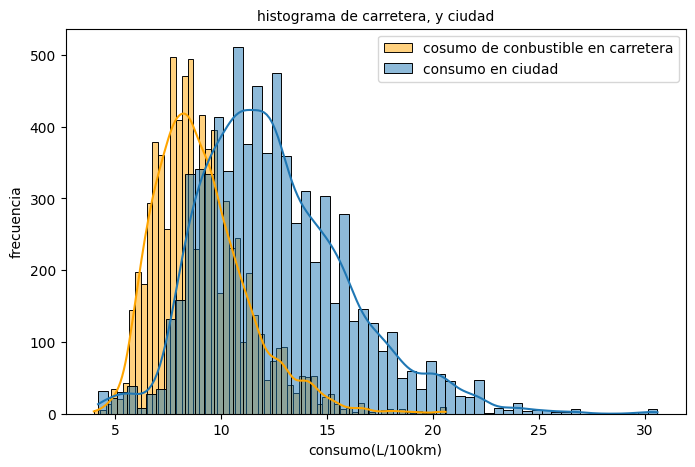

In [19]:
# consumo en carretera y ciudad 
plt.figure(figsize=(8,5))
sns.histplot(data=df, x= 'fuel_cons_hwy', kde=True, label = "cosumo de conbustible en carretera", color="orange")
sns.histplot(data=df, x='fuel_cons_city',  kde=True, label= "consumo en ciudad")
plt.xlabel('consumo(L/100km)', fontsize =10)
plt.ylabel('frecuencia', fontsize =10)
plt.title(f"histograma de carretera, y ciudad", fontsize=10)
plt.legend() # muestra las etiquetas de que muestra o de que es cada color
plt.show()


Text(83.34722222222221, 0.5, 'emiciones co2 (g/km)')

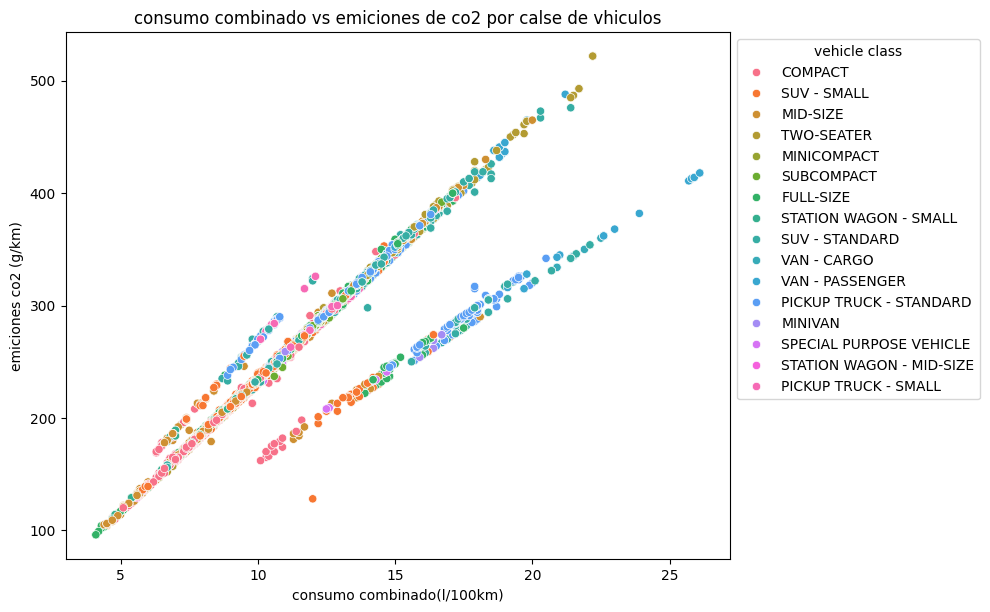

In [20]:
# target vs fuel comsuption cobined (city+hwy)

plt.figure(figsize=(10,6)) #grafica de puntos
sns.scatterplot(data=df, x="fuel_cons_comb", y="co2", hue="vehicle class") # hue: le pone un punto por la clase del vehiculo
plt.legend(bbox_to_anchor=(1,1), loc= "upper left", title="vehicle class")  # bloquea la leyenda en la orilla
plt.tight_layout()
plt.title("consumo combinado vs emiciones de co2 por calse de vhiculos")
plt.xlabel("consumo combinado(l/100km)")
plt.ylabel('emiciones co2 (g/km)')

## Implementacion de Regrecion Lineal


- Regresion Lineal Simple

(5908, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

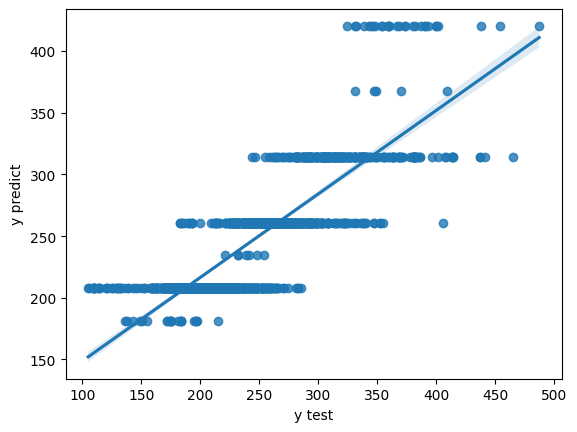

In [21]:
#implemntacion de regresion lineal simple
# x = valor independiente
# y = valor dependiente, en este caso CO2
from sklearn.model_selection import train_test_split # funcion para la separacion correcta del data_set.csv
# separar caracteristiicas independientes seleccionada (cilindros) y la variable objetico es CO2

x = df[['cylinders']] # valores de los cilindros: esta forma nos permite agregar a futuro valores de de regrescion multiple
y = df['co2'] # valores de co2: como es dependiente y estos datos son resultados de una regresion lineal solo debe ser un numero  constante

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # dicicion del data_set, donde tengo dos subconjuntos de una variable
# la funcion anterior  evita que se le manden valores respuesta a la seccion de train, test_size es el tamanio de la muestra del tamanio, aun que tambien se puede especificar el tamanio de train
# el random estate es una semilla que hace simi aleatoria la muestra
print(x_train.shape) # funcion shape hace:


# regresion lineal
from sklearn.linear_model import LinearRegression
model_simple_lin_reg = LinearRegression()

# entrenar modelo
model_simple_lin_reg.fit(x_train, y_train)
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train)
y_pred = model_simple_lin_reg.predict(x_test)



#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show # valor real contra valor predicho, tenemos que tener en cuenta de que la linea tiene que tener un comportamiento donde pasa por todos los puntos

#  entonces en este caso se esta mas cerca del cero, y esto por su valor son muy especificos





In [22]:
# Visualizacion de las metricas
# metricas
# 1 MAE- mean absolute error (error absoluto medio)
        # que mide?:  mide el promedio de las diferencias abasolutas entre los valores rales y prodichos
        # como se interpreta?: no dice, en promedio , cuanto se equivoca el modelo en las predicciones, sin importar  la direccion  del error (positivo o negativo)
        # ejemplo: si predices el precio de las casas en dolares y MAE es de 5,000, esto significa que en promedio  el meodleo se equivoca en 5,000 dolares

        # nos nosimporta si esta sobre estimando o subestimando(5,000 arriba o abajo)

# 2 MSE - mean squared  error (Error cuadratico medio)
        # que mide?: el promedio de los errores  al cuadrado
        # como se interpreta?: penaliza mas los errores garndes , ya que que los eleva al cuadrado

# 3 R2 - Coficiente de determinacion
        # que mide?: la variabilidad de los datos que explica modelo
        # como se interpreta?: el rango suele ser entre 0 y 1, un valor de 0,8 significa que el 80% de la variabilidad de los datos es explicada por el modelo
        # mientras mas cercano a 1 mejor
        # ejemplo:  si tienes un r2, de en un modelo de preccion de ventas, signiifica que el 92, de la variacion en la sventas se puede explicar con variables usadas

# 4 RMSE - Raíz del error cuadrático medio (RMSE)
        #El RMSE es simplemente la raíz cuadrada del MSE, y es más fácil de interpretar porque está en las mismas unidades que la variable objetivo.

from  sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

def validacion(y_train, y_train_pred, y_test, y_pred, value):
    scores = { value + "_train":{"R2": r2_score(y_train, y_train_pred), 
                                  "mae": mean_absolute_error(y_train, y_train_pred), 
                                  "mse": mean_squared_error(y_train, y_train_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred))},
                                  
                value + "_test":{"R2": r2_score(y_test, y_pred), 
                                  "mae": mean_absolute_error(y_test, y_pred), 
                                  "mse": mean_squared_error(y_test, y_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_test, y_pred))}}  
    return pd.DataFrame(scores)


# cuando los resultado en train y test son muy paracidos es que se esta generalizando
rl_scores = validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(rl_scores)

      linear_train  linear_test
R2        0.694892     0.686671
mae      24.563918    24.687990
mse    1043.026380  1077.735633
rmse     32.295919    32.828884


- Regreion Lineal Multiple

In [23]:
# regresion multiple
# x = cilindros y combustible cosumido en ciudad
# y = CO2
x = df[['cylinders', 'fuel_cons_city']] # valores de cilidros y combustible en ciudad
# las variables independientes deben de estar no correlacionadas, por que eso es colinealidad o multicolianlidad
y = df['co2'] # variable independiente respuesta de X

def custom_color(val): # colocar un color coorecto segun el nivel de correlacion 
    if val > 0.90 and val <1:
      color = 'red'  # alta correlacion
    elif val >=1:
      color = 'blue' # 100%
    else:
      color = 'black' # nada que ver

pd.DataFrame(x).corr().style.map(custom_color) # correlacion de los datos con el estilo definido arriba

# NOTA 1 (Multicolinealidad): Evitar una correlación alta (cercana a 1 o -1) entre variables INDEPENDIENTES.
# Ejemplo: Si 'consumo en ciudad' y 'consumo combinado' están muy correlacionadas, el modelo no puede distinguir cuál de las dos realmente afecta a las emisiones de CO2.

# NOTA 2 (Correlación con el Objetivo): Buscar una correlación alta (cercana a 1 o -1) entre la variable INDEPENDIENTE y la DEPENDIENTE (el objetivo).
# Ejemplo: Una alta correlación entre 'tamaño del motor' y 'co2' es buena, porque significa que el tamaño del motor es un buen predictor de las emisiones.

model_multi_lr = LinearRegression() # objeto de regrecion lineal multiple

model_multi_lr.fit(x_train, y_train) # entrenamiento

y_pred= model_multi_lr.predict(x_test) # prediccion con datos de prueba que no ha visto
y_train_pred = model_multi_lr.predict(x_train) # prediccion con los mismos datos de entrenamiento

# validacion a ciegas
mlr_scores= validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(mlr_scores)


      linear_train  linear_test
R2        0.694892     0.686671
mae      24.563918    24.687990
mse    1043.026380  1077.735633
rmse     32.295919    32.828884


## Overfitting y Underfiiting
- las principales causas al obtener malos resultados en Machine learning son el overfitting y el underfitting de los datos.
- cuando entrenamos nuestro modelo "hacer encajar " fit en ingles de los datos de entrada ellos y con salida

- El sobre ajuste y subajuste  hacen referencia al fallo de nuestro modelo  al generalizar  el conocimiento que pretendemos que adquiera

- Underfitting: es como si ajustaramos un modelo con imagenes de perros pero solo le damos imagenes de un tipo de raza en particular, y cuando le pasamos una magen de un perro diferente, no sabra si esta bien, esto a falta de suficientes muestras.
- Overfitting: es cuando le damos un cojunto de imagenes con alta cambio de razas, pero le damos valores o imagenes que tienen una caracteristica en comun que tengan todas, por ejemplo le paso 100 fotos de perritos y todos cafes, cuando le paso un perrito blanco lo tachara como que no es correcto

### Generalizacion del conocimiento
cuando entrenamos nuestros modelos computacionales con un cojunto de datos de entrada estamos haciendo, que el algoritmo sea capaz de generalizar un consepto para que al consultar por que un nuevo conjunto de datos desconocido, este sea capaz  de sintetizarlo . comprendrelo y devlverlos

- si nuestros datos,  de entrenamiento son muy pocoso nuestra maquiena no sera capaz de generalizar  el conocimiento y estera  incurriendo  un underfitting
- el algoritmo no sera capaz de darnos un resultado bueno a falta de material

- si solo entrenamos a nuestra maquina con 10 razas de perros  solo color marron  de manera rigurosa, y al mostrar un dato algo diferente  lo maracara como valor

### Como darnos cuenta de Underfitting y Overfitting
si r2  en entrenamiento da un valor de 0.81 y  en test esta te da un valor de 0.65, el cual esta existiendo un Overfitting, donde se esta aprendiendo lo datos, ya que esta memorizando los datos aprendidos y al momento del test esta no sepa bien como resolverlo dado a esa memorizacion

- Overfitting: es cuando se aprende los datos de casos  particualares  que  le enseñamos  y sera incapaz de reconocer  nuevos datos de entrada, en nuestro conjunto de datos de netrada  muchas veces  instroducimos  muestras atipicas o con ruido  en alguna de sus dimenciones o que no se del todo representativas
cuando sobre entreanamos el modelo  y caemos en overfitting  nuestro algoritmo estara consideranco  como validos solo los datos identicos a los de nuestro cojunto



![OverUnderfitting](OverUnderfitting.jpg)


### solucion

- para recoonocer este problema deberemos de subdividir nuestro cojunto de de datos de entrada para entrenamiento en dos
- entrenamos  nuestro modelo solemos  parametrizar y limitar  el algoritmo por  el ejemplo  de a cantidad  de iteraciones que tendra de aprendizaje: learning_rate por iteracion y muchos otros, la idea es tener pasos muy chiquitos LR= 0.001

para lograr  que nuestro modelo de buenos resultados iremos revisando y constrastando nuestro entrenamienro con nuestro test


#### Como prevenir Overfitting
- cantidad minima de muestras tanto para entrenar el modelo para validarlo
- clases variiadas y equilibradas  en cantidad: es caso  de aprendizaje  supervisado o suponiendo  que tenemos que clasificar diversas clases o categorias  es imporntante

- tener una buena divivion de datos, y ocultar los datos

- ajuste de parametros: deberamos experimnetar  sobre todo dando mas / menos tiempo/iteraciones 

- limitar la cantidad de dimeciones que tenemos, comunmente tenemos  varias variables dependienres, sin suficientes muestras,  a veces conviene  eliminar  o reducir  la cantidad de caracteristicas que utilizaremos para entrenar  el modelo
(por ejemplo podemos usar boruta: algoritmo de como podemos escoger esas variables)

- en redes neuronales, si tenemos varias capas ocultas puede que exista Overfitting 



#### DataSet  desbelanceados
un caso un evidente es en la area de la salud  en donde salemos encontrar conjuntos de datos con miles de regiistros con pacientes "negativos"
- como afecta el desbalance: esto afecta ya que puede que no detecte bien clases a clasificar, por ejemplo si le pasamos 990 fotos de gatos y solo 10 de perros, por lo cual no poemos predecir de manera coorecta un perro ya que falta de datos

## Matriz de confucion
![matrizConfusuin](matrizConfucion.jpg)


### Métricas de evaluación en clasificación

#### Accuracy
- **Definición:** Proporción de predicciones correctas (positivas y negativas) sobre el total de predicciones.  
- **Fórmula:**
\[
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
\]
- Donde:
  - **TP** = Verdaderos Positivos  
  - **TN** = Verdaderos Negativos  
  - **FP** = Falsos Positivos  
  - **FN** = Falsos Negativos  

---

#### Precision
- **Definición:** De todos los casos que el modelo predijo como positivos, ¿cuántos fueron realmente positivos?  
- **Fórmula:**
\[
$$Precision = \frac{TP}{TP + FP}$$
\]

---

#### Recall (Sensibilidad o Tasa de verdaderos positivos)
- **Definición:** De todos los casos que realmente eran positivos, ¿cuántos identificó correctamente el modelo?  
- **Fórmula:**
\[
$$Recall = \frac{TP}{TP + FN}$$
\]

---

#### F1-Score
- **Definición:** Media armónica entre Precision y Recall. Balancea ambas métricas.  
- **Rango:** Mejor valor = 1, peor valor = 0.  
- **Fórmula:**
\[
$$F1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$
\]



alta presicion  y alto recall: el modelo maneja perctamente  esa clase

alta presicion y bajo recall: el moeldo no detacta bien  la clase muy bien, pero cuando lo hace es altamente confiable

baja precision y alto recall:  la clase detecta bien la clase  pero  tambien incluye muestras  de otras clases

baja presicion y bajo recall: noa se aprendio nadotaaaaa


cuando tenemos un data set con equilibrio suele  ocurrir  obtnemos  un alto valor  de precision en las clase mayoritaria y un bajo recall en la clase  minoritaria

- ADASYN
- SMOTE
- BAGGING

## K-Folts (validacion cruzada)
por su traduccion  al espanol  podriamos interpretar como k-Dobleces. esto  es por que hacemos que k particiones de tamano  N  antes de dicidirla  en particiones p  de entrenamiento y prueba 

 size(N/K)

si tuvieramos un k=4, esto significa que  que tendremos 4 particiones, donde  se estara calcuando con diferentes muestras, donde los datos de test estaran rotando por particion que se hara test, y el sobrante  sera el train, accuracy(n)


se puede comparacion con cualquier metrica de test con train para saber que no hay Overfitting, esto con validacion a ciegas y  validacion cruzada

- que es validacion a ciegas?:

## Evaluacion de algoritmo

- curva roc: area bajo la curva, ds dice que tan bueno puede distinger entre dos o mas clases, mejores modelos pueden distingir con precision entre los datos , mientras que un modelo  pobre tendra dificultades para distingir  entre los dos, rango (0 a 1)

todos los valores negativos por debajo  del 


sencibilida: es la proporcion de pacieentes que se identificaron correctamente sobre el numero ottal que realemnete tiene la enfermedad
\[
$$sencibilida = \frac{VP}{VP + FN}$$
\]


especificidad: es la proporcion que se identificaron pcooerectamente por no tener la enfermedad 
\[
$$1-especificidad = \frac{VN}{VN + FN}$$
\]



estas dos metricas nos ayudaran a sacar el area bajo la curva, donde y = sensibilidad y x = especibilidad,
- sencibilidad alta, me clasicic muy bien mientras que del otro lado no lo hace tan bien
- specificidad alta: pasa los mismo


foto curva roc 


se debe de ver como una curva, solo hay que tener  cuidado con metricas espectaculares, ya que tenemos que ver que no sea Overfitting, doende  tenermos que estar variando del 0.5 hasta 0.99


- si se traslapa ena sobre la otra, significa que no esta aprendiendo nada

- si sale invertida, significa que si encontro el patron pero los esta clasificando al reves, que quiere decir quee la curva salio por debajo de 0.5 o menos

- Curva PR (Precision-Recall)
area grande bajo la curva con alta exactitud y alta presicion, donde la alta presicion se reaciona  con una baja tasa de falsos positivos y alta exactitud  se relaciona con la baja tasa de falsos negativos

## K-NN clasificador

esta basado en instancias,  de tipo supervisado, puede usarse para clasificar nuevas muetras  (valores discretos) o predecir  (regresion, valores continuos)

- supervisado: regresa feefback  (etiqueta)

- KNNClassifier
- KNNRegressor

sirve ensencialmente  para cllasificar valores buscando  los puntos, de datos "mas similares" aprendidos en la estaoa de entrenamiento

es un metodo que simplemente  busca en las observaciones mas cercanas a la que esta tratando de prededir y clasifica  el punto de interes, basadoo en la mayoria de los datos, que lo rodean:
    - es supervisado
    - basado en instancia: esto quiere dedir que niestros algoritmo no aprende explicitamente un meodleo, en cambio memoriza las instancias de entrenamiento, que son usadas como "base de conocimiento" para la prediccion

coeficientes cepstrales de mel

pros y contras:
- es sencillo de aprender
- ocupa muchos recursos ya que usa todo el data set  para calcular los puntos


como funciona
- se calcula la distancia a cada item del data set
- se selecciona una k vecinos, comunmente se usa una k impar para no caer en empates
- se da la prediccion


comunmente se usa la distancia euclidiana aun que tambien se usa la similitud de coseno(que mide el angulo d los vectores, cuanto menores, seran similares), este ultimo s epuede usar para saber la similituda entre imagenes

entre mas caracteristicas importates "aporten", puede aumentar los resultados de r2

knn queda abastracto en cuento a las dimenciones de los datos y caracteristicas a usar

como se decide el numero de vecinos:
tenemos tener cuidado con el k que usamos ya que este puede dar problemas o errores de clasificasion: para esto existe el metodo elbow, que define cual es el mejor k para usar

- pocos vecinos = menos sesgo pero lata varianza
- muchos vecinos = muchos sego

calculos de distancia:
- distancia euclidiana
- distancia de manhattan
- distancia  minkowski



## Enfermedades cardiacas - implementacion de KNN

Contexto:

Las enfermedades cardíacas, también conocidas como enfermedades cardiovasculares, son un término amplio que se utiliza para referirse a las enfermedades y afecciones que afectan al corazón y al sistema circulatorio. Son una de las principales causas de discapacidad en todo el mundo. Dado que el corazón es uno de los órganos más vitales del cuerpo, sus enfermedades afectan también a otros órganos y partes del cuerpo. Existen varios tipos y formas diferentes de enfermedades cardíacas. Las más comunes causan estrechamiento u obstrucción de las arterias coronarias, mal funcionamiento de las válvulas del corazón, aumento del tamaño del corazón y otras que provocan insuficiencia cardíaca y ataques cardíacos».


Datos clave según la OMS (Organización Mundial de la Salud)
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo.
Se estima que 17,9 millones de personas murieron por ECV en 2019, lo que representa el 32 % de todas las muertes a nivel mundial. De estas muertes, el 85 % se debieron a infartos y accidentes cerebrovasculares.
Más de tres cuartas partes de las muertes por ECV se producen en países de ingresos bajos y medios.
De los 17 millones de muertes prematuras (antes de los 70 años) por enfermedades no transmisibles en 2019, el 38 % se debieron a ECV.
La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales, como el consumo de tabaco, la alimentación poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol.
Es importante detectar las enfermedades cardiovasculares lo antes posible para poder comenzar el tratamiento con asesoramiento y medicamentos.

In [24]:
# librerias necesarias
import numpy as np
import pandas as pd # leer arachivos .csv y mas cosas cientificas
from  scipy import stats
import seaborn as sns # hijo d eplot: para graficas
import matplotlib.pyplot as plt # base para graficas
from scipy.stats import uniform

In [25]:
data = pd.read_csv("heart.csv")
print('shape de la infromacion es' , data.shape)
# poner que es cada encabezado de d ela columnas
data.head()

shape de la infromacion es (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# eliminacion fuera de lo rangos: borrar el registro completo
# Revisar  los valores unc=icos de la columna ca en caso de haya un valor  menor a 0 o mayor que 3
# Revisar  los valores unicos de la columna thal, en caso de que el valor sea menos o igual a cero o mayor trees o nan, eliminarlos
def eliminacion_datos_fuera_rango(data):
    # Crear máscara para los valores fuera del rango [0, 3]
    mask = (data["ca"] > 3) | (data["ca"] < 0)

    # Eliminar las filas que cumplan la condición
    data = data.drop(data[mask].index)

    return data

data = eliminacion_datos_fuera_rango(data)
print(data.shape)

(298, 14)
